Library Import

In [1]:
import numpy as np
import pandas as pd
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()

Logistic Regression

In [2]:
class LogisticRegression:
    def sigmoid(self,z):
        return 1/(1+exp(-z))
    def setDefault(self,X):
        W=np.random.randn(1,X.shape[1])/np.sqrt(X.shape[0])
        return W
    def train(self,X,Y,X_Val,Y_Val,alpha=0.01,epoch=400):
        W=self.setDefault(X)
        train_loss=[]
        val_loss=[]
        epochs=[]
        def updateWeight(A,W):
            t=A-Y.T
            m=X.shape[0]
            t=np.reshape(t,m)
            dW = np.dot(X.T,t)/m
            W=W-(alpha*dW)
            return W
        def loss(Y,Y_Pred):
            v=0
            for i in range(len(Y)):
                v+=Y[i]*log(Y_Pred[i])
            t=-v/X.shape[0]
            return t
        for i in range(epoch):
            z=W.dot(X.T)
            A=self.sigmoid(z)
            W=updateWeight(A,W)
            epochs.append(i)
            Y_Train_Pred=[]
            Y_Val_Pred=[]
            Z=(W.dot(X.T))
            for z in Z[0]:
                Y_Train_Pred.append(self.sigmoid(z))
            Z=(W.dot(X_Val.T))
            for z in Z[0]:
                Y_Val_Pred.append(self.sigmoid(z))
            train_loss.append(loss(Y,Y_Train_Pred))
            val_loss.append(loss(Y_Val,Y_Val_Pred))    
        self.W=W
        return epochs,train_loss,val_loss,W
    def predict(self,X,W):
        Z=(W.dot(X.T))
        y=[]
        for z in Z[0]:
            y.append(self.sigmoid(z))
        Y_Pred=[]
        for i in y:
            if i>0.5:
                Y_Pred.append(1)
            else:
                Y_Pred.append(0)
        return Y_Pred

F1 Score, Recall, Accuracy, Precision

In [3]:
def F1_Score(Y,Y_Pred):
    TP,TN,FP,FN = 0,0,0,0
    for i in range(len(Y)):
        if Y[i]==1 and Y_Pred[i]==1:
            TP+=1
        elif Y[i]==1 and Y_Pred[i]==0:
            FN+=1
        elif Y[i]==0 and Y_Pred[i]==1:
            FP+=1
        elif Y[i]==0 and Y_Pred[i]==0:
            TN+=1
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    accuracy=(TP+TN)/(TP+FP+FN+TN)
    f1_score = 2*precision*recall/(precision+recall)
    return accuracy,precision,recall,f1_score

Dataset Import

In [4]:
data = pd.read_csv('Datasets/LogisticRegression/Pumpkin_Seeds_Dataset_1.csv')

In [5]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


Data Pre-Processing

In [6]:
data['Class']=pd.factorize(data.Class)[0]

In [7]:
data['Class'].value_counts()

Class
0    1300
1    1200
Name: count, dtype: int64

Normalizing to avoid overflow

In [8]:
def normalize(X):
    for column in X:
        mean=np.mean(X[column])
        std=np.std(X[column])
        X[column]=(X[column]-mean)/std
    return X

Randomizing the sample

In [9]:
data=data.sample(frac=1)

In [10]:
data.shape

(2500, 13)

In [11]:
x=data.iloc[:,:12]
y=data.iloc[:,12]

In [12]:
x=normalize(x)

Train Test Validation Split

In [13]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(x,y,test_size=0.2,random_state=1)
X_Train,X_Val,Y_Train,Y_Val=train_test_split(X_Train,Y_Train,test_size=0.375,random_state=1)

In [14]:
print(X_Train.shape)
print(X_Test.shape)
print(X_Val.shape)
print(Y_Train.shape)
print(Y_Test.shape)
print(Y_Val.shape)

(1250, 12)
(500, 12)
(750, 12)
(1250,)
(500,)
(750,)


Verifying if the dataset is balanced

In [15]:
print(Y_Train.value_counts())
print(Y_Test.value_counts())
print(Y_Val.value_counts())

Class
0    638
1    612
Name: count, dtype: int64
Class
0    273
1    227
Name: count, dtype: int64
Class
0    389
1    361
Name: count, dtype: int64


In [16]:
X_Train=X_Train.to_numpy()
X_Test=X_Test.to_numpy()
X_Val=X_Val.to_numpy()
Y_Train=Y_Train.to_numpy()
Y_Test=Y_Test.to_numpy()
Y_Val=Y_Val.to_numpy()

Model Training

In [17]:
model=LogisticRegression()

In [18]:
epoch,train_loss,val_loss,W=model.train(X_Train,Y_Train,X_Val,Y_Val,alpha=0.1,epoch=400)

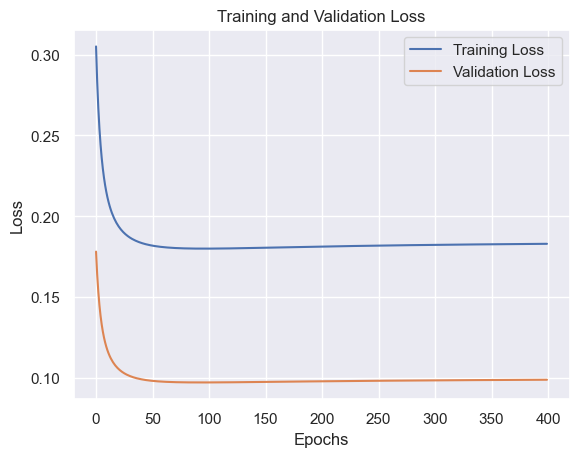

In [19]:
plt.plot(epoch,train_loss,label='Training Loss')
plt.plot(epoch,val_loss,label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [20]:
Y_Test_Pred=model.predict(X_Test,W)
Y_Train_Pred=model.predict(X_Train,W)

In [21]:
accuracy_train,precision_train,recall_train,f1_score_train=F1_Score(Y_Train_Pred,Y_Train)
accuracy_test,precision_test,recall_test,f1_score_test=F1_Score(Y_Test_Pred,Y_Test)

In [22]:
print("Train Accuracy: ",accuracy_train)
print("Train Precision: ",precision_train)
print("Train Recall: ",recall_train)
print("Train F1 Score: ",f1_score_train)

Train Accuracy:  0.8672
Train Precision:  0.8513071895424836
Train Recall:  0.8741610738255033
Train F1 Score:  0.8625827814569537


In [23]:
print("Test Accuracy: ",accuracy_test)
print("Test Precision: ",precision_test)
print("Test Recall: ",recall_test)
print("Test F1 Score: ",f1_score_test)

Test Accuracy:  0.874
Test Precision:  0.8590308370044053
Test Recall:  0.8628318584070797
Test F1 Score:  0.8609271523178808
